# Import Python Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

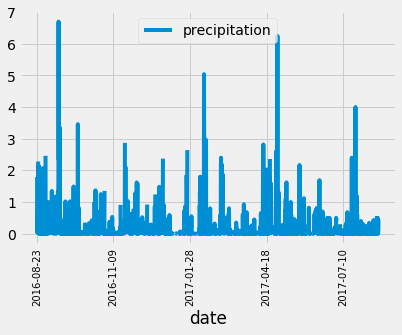

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
result=[]
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)
# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(fontsize =10,rotation=90)

In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [11]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station))
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
session.query(func.min(Measurement.tobs)).all()

[(53.0)]

In [13]:
# highest temperature recorded, and average temperature most active station?s
session.query(func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(85.0, 71.66378066378067)]

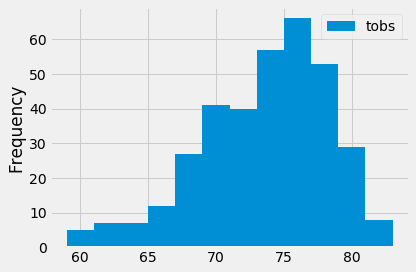

In [14]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year)
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

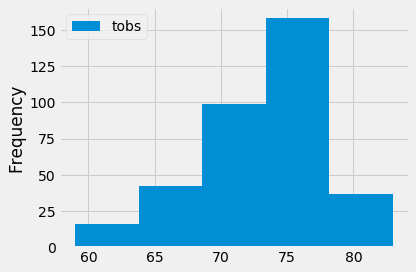

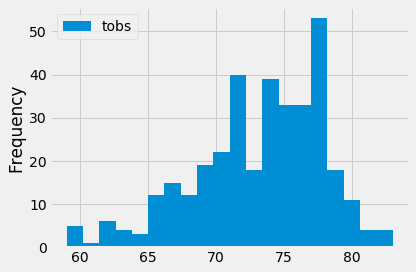

In [15]:
# Skill drill
df.plot.hist(bins=5)
plt.tight_layout()

df.plot.hist(bins=20)
plt.tight_layout()


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
def calc_temps(start=None, end=None):
# and return the minimum, average, and maximum temperatures for that range of dates
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return jsonify(temps =temps)

# Challenge

## Objectives
### The goals of this challenge are for you to:

#### - Determine key statistical data about the month of June.
#### - Determine key statistical data about the month of December.
#### - Compare your findings between the month of June and December.
#### - Make 2 or 3 recommendations for further analysis.
#### - Share your findings in the Jupyter Notebook.

In [26]:
# Load data for all year
results =[]
results = session.query(Measurement.date, Measurement.prcp)
df = pd.DataFrame(results, columns=['date','precipitation'])
df['date']= pd.to_datetime(df['date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19550 non-null  datetime64[ns]
 1   precipitation  18103 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 305.6 KB


In [37]:
# Assign data in June for all year to df_Jun
Jun= df['date'].dt.month.between(6,6)
df_Jun = df.loc[Jun]
print(df_Jun.sample(5))
print(df_Jun.describe())

            date  precipitation
3265  2011-06-29           0.00
160   2010-06-28           0.00
13430 2013-06-02           0.17
17455 2011-06-21           1.03
151   2010-06-19           0.00
       precipitation
count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000


In [38]:
# Assign data in December for all year to df_Dec
# Identify key statistical data in December for all year
Dec= df['date'].dt.month.between(12,12)
df_Dec = df.loc[Dec]
print(df_Dec.sample(5))
print(df_Dec.describe())

            date  precipitation
6005  2011-12-21           0.25
7112  2015-12-17           0.13
12546 2010-12-27           0.13
16393 2013-12-30           0.00
7767  2010-12-06           0.00
       precipitation
count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000


### Findings from comparative analysis of June vs December
- The key difference between weather in June and December is mean amount and max of precipitation. As expected there's more precipitation during summer season according to mean precipitation. But according to max data there was  heavy rain or snow during winter season and the amount of precipitation is more fluctuated during winter season than summer season. 

### Recommendations for further analysis
- Make scatter plots for visual comparison on distributions of Jun and Dec 
- Make box plots for each month 
- Analyze 2 sample t-test for mean value comparison 
